# LSTM Stock Forecasting

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
# Define stock symbol and dataset filename
STOCK_SYMBOL = "SPY"
DATA_FILENAME = "weekly_adjusted_SPY.csv"

In [3]:
def load_dataset() -> pd.DataFrame:
    # Load the dataset
    data = pd.read_csv(f"data/{DATA_FILENAME}")
    data = data[['timestamp', 'adjusted close']]
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data.sort_values('timestamp', inplace=True)

    # Prepare the data
    data['adjusted close'] = data['adjusted close'].astype(float)
    series = data['adjusted close'].values

    return series

In [4]:
def create_sequences(
    data: pd.DataFrame,
    n_steps: int
) -> np.ndarray:
    # Create input-output sequences
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Prepare data for LSTM
series = load_dataset()
n_steps = 3
X, y = create_sequences(series, n_steps)

# Reshape input for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(
    LSTM(
        50,
        activation='relu',
        return_sequences=True,
        input_shape=(n_steps, 1)
    )
)
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Predict
predictions = model.predict(X_test, verbose=0)

/Users/nhtrinh/Desktop/cmpe255-team-project/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


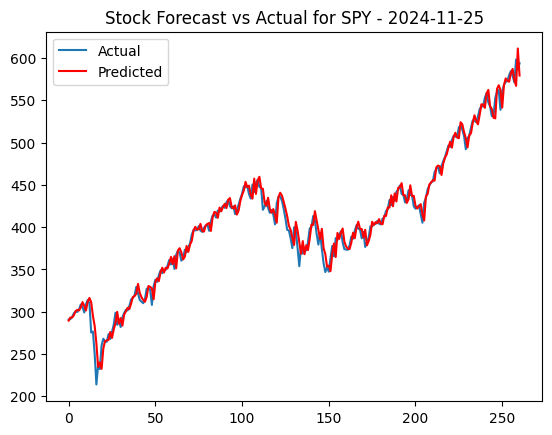

In [6]:
# Plot the results
plt.title(
    f'Stock Forecast vs Actual for {STOCK_SYMBOL} - '
    + pd.Timestamp.now().strftime("%Y-%m-%d")
)
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted", color="red")
plt.legend()

# If FigureCanvasAgg is interactive show plot
if matplotlib.is_interactive():
    plt.show()
else:
    plt.savefig(f'output/LSTM_{STOCK_SYMBOL}_forecast.png')